In [1]:
import os
import errno
import random
import shutil
import zipfile
import skimage.io as io

import numpy as np
from tensorflow.python import keras

from deepcell.utils.data_utils import make_training_data
from deepcell.utils.data_utils import get_data
from deepcell.utils.io_utils import get_image_sizes
from deepcell.utils.export_utils import export_model
from deepcell.utils.train_utils import rate_scheduler
from deepcell.model_zoo import bn_feature_net_2D
from deepcell.model_zoo import bn_feature_net_skip_2D
from deepcell.training import train_model_sample
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [38]:
CHANNEL_AXIS = 3
training_data = np.load(os.path.join('/notebooks/Noah_Scripts/notebooks/output/npz_data', 
                                     "Point1_12_18_23_3X_interior_border_cell" + ".npz"))

X, y = training_data["X"], training_data["y"]
print("X.shape: {} & y.shape: {}".format(X.shape, y.shape))


X.shape: (4, 1024, 1024, 3) & y.shape: (4, 1024, 1024, 1)


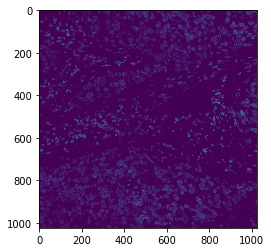

In [3]:
temp = X[:, :, :, 0:1]
temp.shape
plt.imshow(temp[0, :, :, 0])

In [51]:
MODEL_NAME = 'Point1_12_18_3X_interior_border_border_30'
weights_path = os.path.join('/notebooks/Noah_Scripts/notebooks/output/models', 
                            MODEL_NAME + ".h5")

In [40]:
X = X[:, :, :, 0:3]

In [52]:
# Load the previously generated weights
# from deepcell import model_zoo

run_sample_model = bn_feature_net_2D(
    n_dense_filters=128,
    n_conv_filters=32,
    dilated=True,
    n_features=4,
    norm_method='std',
    receptive_field=61,
    n_channels=1,    
    input_shape=tuple(X.shape[1:]))

run_sample_model.load_weights(weights_path)

In [53]:
test_images = run_sample_model.predict(X[:, :, :, :])

print('model output shape:', test_images.shape)

model output shape: (4, 1024, 1024, 4)


In [54]:
np.save('/notebooks/Noah_Scripts/notebooks/output/models/' + MODEL_NAME + '_metrics', test_images)

In [50]:
import copy
test_2 = copy.copy(test_images)
# test_2 = np.load('/notebooks/Noah_Scripts/notebooks/output/models/' + 'Point1_12_18_3X_interior_save_10' + '_metrics.npy')

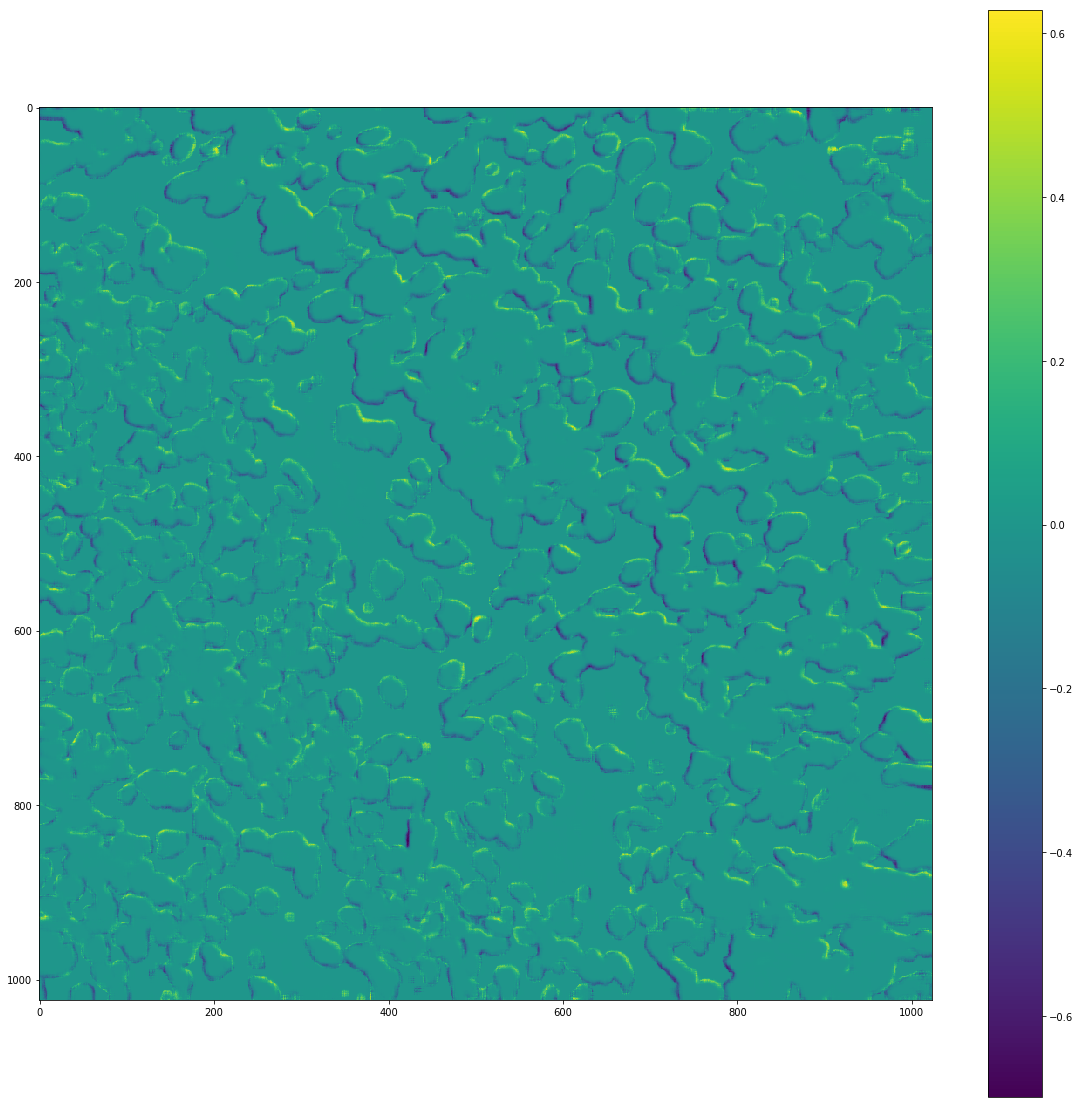

In [59]:
plt.figure(figsize = (20, 20))
plt.imshow(test_images[2, :, :, 3] - test_2[2, :, :, 3])
plt.colorbar()